<a href="https://colab.research.google.com/github/ndtuan10/MachineLearning-and-ComputerVision/blob/main/CV/BaiTap/Process%20of%20content%20based%20image%20retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ngô Đức Tuấn**
MSSV: 18520186
##**Bài tập: Process of content based image retrieval (CBIR) - Quy trình truy xuất hình ảnh dựa trên nội dung**

### Dataset: Holidays

### Features: Histogram, Deep method (ResNet, VGG16)

### Metrics: Cosine, Euclidean

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import thư viện cần dùng
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
from scipy.spatial.distance import cdist # tính khoảng cách distance giữa các cặp điểm

print('''
  Phiên bản của các thư viện :
    + numpy : {0}
    + matplotlib : {1}
'''.format(np.__version__, matplotlib.__version__))


  Phiên bản của các thư viện :
    + numpy : 1.19.5
    + matplotlib : 3.2.2



# **Giới thiệu về INRIA Holidays dataset**
- Tập dữ liệu **`Holidays`** là một tập các hình ảnh chứa một số hình ảnh về holidays. Những ảnh còn lại được thực hiện nhằm mục đích kiểm tra độ chắc chắn đối với các nhiễu khác nhau như: xoay (rotation), thay đổi góc nhìn và ánh sáng (viewpoint and illumination changes), làm mờ (blurring), v.v. Bộ dữ liệu bao gồm rất nhiều loại cảnh (tự nhiên, nhân tạo, hiệu ứng nước và lửa, v.v.) và có độ phân giải cao. 

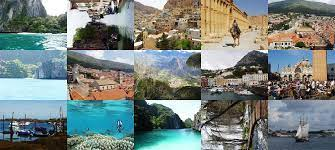

- Tập dữ liệu chứa 500 nhóm hình ảnh, mỗi nhóm đại diện cho một cảnh hoặc đối tượng riêng biệt. Hình ảnh đầu tiên của mỗi nhóm là hình ảnh truy vấn (query image) và kết quả truy xuất chính xác là các hình ảnh khác của nhóm.
- Kích thước tập dữ liệu gồm 
    - Tổng cộng 1491 hình ảnh: 500 truy vấn và 991 hình ảnh liên quan tương ứng.
    - Số lượng truy vấn: 500 (một truy vấn cho mỗi nhóm)
    - Số lượng bộ mô tả được sản xuất: 4455091 bộ mô tả SIFT về kích thước 128

- Ta có thể tải dataset trực tiếp từ đây [INRIA Holidays datasets](http://lear.inrialpes.fr/~jegou/data.php).

# **Chọn 500 ảnh queries + Tính khoảng cách Cosine + Viết kết quả**

**Tính khoảng cách bằng độ đo Cosine**

In [ ]:
def CBIR(path, filename, n):
    query_features = [] # mảng chứa các queries
    query_names = []
    histogram_features = []
    histogram_names = []
    list_path = glob.glob(os.path.join(path,"*.npy"))
    for f in list_path:
        name = os.path.basename(f).split(".")[0] # sau dấu chấm lấy mảng chuỗi đầu tiên
        histogram_names.append(name)
        histogram_features.append(np.load(f))
        # nếu dịch trái 2 chữ số == '00', thì ảnh đó là ảnh queries
        if name[-2:] == '00': # dịch trái 2 chữ số, còn lại phần trước lấy hết
            query_names.append(name)
            query_features.append(np.load(f))
    print(len(query_features))

    # Tính khoảng cách bằng độ đo Cosine
    query_features = np.array(query_features)
    histogram_features = np.array(histogram_features)
    results = np.array(cdist(query_features.reshape(500, n), histogram_features.reshape(1491, n), 'cosine'))
    print(results.shape)

    # Viết kết quả
    with open(os.path.join(filename), 'w', encoding='utf-8') as f:

        for (i, result) in enumerate(results):
            line = "{}.jpg ".format(query_names[i])

            rank = np.argsort(result)
            # sắp xếp theo rank        
            appended_text = str()
            # chọn top 10 queries
            for j, index in enumerate(rank[:10]):
                appended_text += histogram_names[index] + ".jpg " + str(j+1) + " "
        
            line += str(0) + " " + appended_text +'\n'
        
            f.writelines(line)

## **Đánh giá**

In [ ]:
%cd '/content/drive/My Drive/CS331.L22.KHCL/Dataset/Holiday/'

/content/drive/.shortcut-targets-by-id/18NONjqIRuJ38_o7X3d-r_guaGvFcyC_f/CS331.L22.KHCL/Dataset/Holiday


### Histogram

In [ ]:
path = 'features/hist256numpy/'
filename = os.path.join('eval_holidays', '18520186.dat')

CBIR(path, filename, 256)

500
(500, 1491)


### ResNet50

In [ ]:
path = 'features/ResNet50/'
filename = os.path.join('eval_holidays', '18520186_ResNet.dat')

CBIR(path, filename, 1000)

500
(500, 1491)


### VGG16

In [ ]:
path = 'features/VGG16/'
filename = os.path.join('eval_holidays', '18520186_VGG16.dat')

CBIR(path, filename, 4096)

500
(500, 1491)


In [ ]:
%cd eval_holidays

/content/drive/.shortcut-targets-by-id/18NONjqIRuJ38_o7X3d-r_guaGvFcyC_f/CS331.L22.KHCL/Dataset/Holiday/eval_holidays


In [ ]:
cat 18520186.dat

146300.jpg 0 146300.jpg 1 115001.jpg 2 147402.jpg 3 147400.jpg 4 138104.jpg 5 105800.jpg 6 139404.jpg 7 106202.jpg 8 106200.jpg 9 106201.jpg 10 
146000.jpg 0 146000.jpg 1 113900.jpg 2 146405.jpg 3 143100.jpg 4 136002.jpg 5 114500.jpg 6 139900.jpg 7 103702.jpg 8 114501.jpg 9 134403.jpg 10 
146800.jpg 0 146800.jpg 1 128501.jpg 2 104902.jpg 3 104901.jpg 4 100503.jpg 5 146901.jpg 6 147101.jpg 7 149100.jpg 8 141600.jpg 9 100501.jpg 10 
146900.jpg 0 146900.jpg 1 129000.jpg 2 132303.jpg 3 100501.jpg 4 100001.jpg 5 147302.jpg 6 127301.jpg 7 104701.jpg 8 110701.jpg 9 109901.jpg 10 
146500.jpg 0 146500.jpg 1 100400.jpg 2 123100.jpg 3 114501.jpg 4 123204.jpg 5 134403.jpg 6 138005.jpg 7 134402.jpg 8 138009.jpg 9 121701.jpg 10 
147100.jpg 0 147100.jpg 1 140400.jpg 2 140901.jpg 3 135300.jpg 4 147402.jpg 5 125600.jpg 6 135301.jpg 7 148701.jpg 8 138006.jpg 9 114901.jpg 10 
146700.jpg 0 146700.jpg 1 127701.jpg 2 110702.jpg 3 124901.jpg 4 102400.jpg 5 137501.jpg 6 136707.jpg 7 136802.jpg 8 134401.jpg 9 

In [ ]:
cat 18520186_VGG16.dat

145000.jpg 0 145000.jpg 1 145002.jpg 2 145001.jpg 3 145003.jpg 4 107801.jpg 5 126805.jpg 6 147502.jpg 7 140001.jpg 8 107800.jpg 9 147501.jpg 10 
144900.jpg 0 144900.jpg 1 124802.jpg 2 127900.jpg 3 148401.jpg 4 120101.jpg 5 133202.jpg 6 133201.jpg 7 133200.jpg 8 124801.jpg 9 129002.jpg 10 
145100.jpg 0 145100.jpg 1 145101.jpg 2 145200.jpg 3 145201.jpg 4 138703.jpg 5 138702.jpg 6 139300.jpg 7 138800.jpg 8 138704.jpg 9 138705.jpg 10 
145800.jpg 0 145800.jpg 1 145801.jpg 2 146201.jpg 3 147202.jpg 4 146207.jpg 5 146202.jpg 6 136100.jpg 7 136102.jpg 8 135501.jpg 9 135500.jpg 10 
145400.jpg 0 145400.jpg 1 145401.jpg 2 145402.jpg 3 143401.jpg 4 128900.jpg 5 143301.jpg 6 128901.jpg 7 148701.jpg 8 112101.jpg 9 143300.jpg 10 
145500.jpg 0 145500.jpg 1 145502.jpg 2 145501.jpg 3 115500.jpg 4 108104.jpg 5 146401.jpg 6 146206.jpg 7 120600.jpg 8 116001.jpg 9 146203.jpg 10 
145700.jpg 0 145700.jpg 1 146207.jpg 2 144701.jpg 3 145701.jpg 4 145800.jpg 5 146202.jpg 6 134504.jpg 7 134503.jpg 8 146201.jpg 9 

In [ ]:
cat 18520186_ResNet.dat

103400.jpg 0 103400.jpg 1 103401.jpg 2 103600.jpg 3 103100.jpg 4 103900.jpg 5 102000.jpg 6 103901.jpg 7 103101.jpg 8 107202.jpg 9 103601.jpg 10 
103300.jpg 0 103300.jpg 1 111001.jpg 2 143500.jpg 3 143501.jpg 4 111000.jpg 5 107701.jpg 6 103303.jpg 7 142701.jpg 8 131100.jpg 9 126703.jpg 10 
103700.jpg 0 103700.jpg 1 103800.jpg 2 104100.jpg 3 104005.jpg 4 104000.jpg 5 104004.jpg 6 104006.jpg 7 104101.jpg 8 104002.jpg 9 104001.jpg 10 
103600.jpg 0 103600.jpg 1 103100.jpg 2 103900.jpg 3 103401.jpg 4 106201.jpg 5 103101.jpg 6 103901.jpg 7 103701.jpg 8 102001.jpg 9 106202.jpg 10 
103500.jpg 0 103500.jpg 1 103501.jpg 2 103503.jpg 3 103502.jpg 4 103801.jpg 5 106202.jpg 6 101800.jpg 7 103700.jpg 8 103800.jpg 9 104100.jpg 10 
103800.jpg 0 103800.jpg 1 104100.jpg 2 103700.jpg 3 104005.jpg 4 104000.jpg 5 104101.jpg 6 104004.jpg 7 104006.jpg 8 104001.jpg 9 104002.jpg 10 
103900.jpg 0 103100.jpg 1 103900.jpg 2 103401.jpg 3 103901.jpg 4 103101.jpg 5 103600.jpg 6 103701.jpg 7 106201.jpg 8 103501.jpg 9 

## Tính mean average precision (mAP)

In [ ]:
!python2 holidays_map.py 18520186.dat

mAP for 18520186.dat: 0.14559


In [ ]:
!python2 holidays_map.py 18520186_VGG16.dat

mAP for 18520186_VGG16.dat: 0.69583


In [ ]:
!python2 holidays_map.py 18520186_ResNet.dat

mAP for 18520186_ResNet.dat: 0.25917


### Report

In [ ]:
import pandas as pd

print('Kết quả cho độ đo Cosine là: ')

results_dict={'Đặc trưng _ Độ đo sử dụng':['Histogram_Cosine', 'VGG16_Cosine', 'ResNet50_Cosine'],
              'mAP':['0.14559', '0.69583', '0.25917']}
pd.DataFrame(results_dict)

Kết quả cho độ đo Cosine là: 


,Đặc trưng _ Độ đo sử dụng,mAP
0,Histogram_Cosine,0.14559
1,VGG16_Cosine,0.69583
2,ResNet50_Cosine,0.25917


# **Chọn 500 ảnh queries + Tính khoảng cách Euclidean + Viết kết quả**

**Tính khoảng cách bằng độ đo Euclidean**

In [ ]:
def CBIR(path, filename, n):
    query_features = [] # mảng chứa các queries
    query_names = []
    histogram_features = []
    histogram_names = []
    list_path = glob.glob(os.path.join(path,"*.npy"))
    for f in list_path:
        name = os.path.basename(f).split(".")[0] # sau dấu chấm lấy mảng chuỗi đầu tiên
        histogram_names.append(name)
        histogram_features.append(np.load(f))
        # nếu dịch trái 2 chữ số == '00', thì ảnh đó là ảnh queries
        if name[-2:] == '00': # dịch trái 2 chữ số, còn lại phần trước lấy hết
            query_names.append(name)
            query_features.append(np.load(f))
    print(len(query_features))

    # Tính khoảng cách bằng độ đo Euclidean
    query_features = np.array(query_features)
    histogram_features = np.array(histogram_features)
    results = np.array(cdist(query_features.reshape(500, n), histogram_features.reshape(1491, n), 'euclid'))
    print(results.shape)

    # Viết kết quả
    with open(os.path.join(filename), 'w', encoding='utf-8') as f:

        for (i, result) in enumerate(results):
            line = "{}.jpg ".format(query_names[i])

            rank = np.argsort(result)
            # sắp xếp theo rank        
            appended_text = str()
            # chọn top 10 queries
            for j, index in enumerate(rank[:10]):
                appended_text += histogram_names[index] + ".jpg " + str(j+1) + " "
        
            line += str(0) + " " + appended_text +'\n'
        
            f.writelines(line)

## **Đánh giá**

In [ ]:
%cd '/content/drive/My Drive/CS331.L22.KHCL/Dataset/Holiday/'

/content/drive/.shortcut-targets-by-id/18NONjqIRuJ38_o7X3d-r_guaGvFcyC_f/CS331.L22.KHCL/Dataset/Holiday


### Histogram

In [ ]:
path = 'features/hist256numpy/'
filename = os.path.join('eval_holidays', '18520186_Euclid.dat')

CBIR(path, filename, 256)

500
(500, 1491)


### ResNet50

In [ ]:
path = 'features/ResNet50/'
filename = os.path.join('eval_holidays', '18520186_ResNet_Euclid.dat')

CBIR(path, filename, 1000)

500
(500, 1491)


### VGG16

In [ ]:
path = 'features/VGG16/'
filename = os.path.join('eval_holidays', '18520186_VGG16_Euclid.dat')

CBIR(path, filename, 4096)

500
(500, 1491)


In [ ]:
%cd eval_holidays

/content/drive/.shortcut-targets-by-id/18NONjqIRuJ38_o7X3d-r_guaGvFcyC_f/CS331.L22.KHCL/Dataset/Holiday/eval_holidays


In [ ]:
cat 18520186_Euclid.dat

146300.jpg 0 146300.jpg 1 115001.jpg 2 138104.jpg 3 147402.jpg 4 147400.jpg 5 106202.jpg 6 106200.jpg 7 106201.jpg 8 138103.jpg 9 105800.jpg 10 
146000.jpg 0 146000.jpg 1 113900.jpg 2 146405.jpg 3 143100.jpg 4 136002.jpg 5 114500.jpg 6 139900.jpg 7 114501.jpg 8 134403.jpg 9 134402.jpg 10 
146800.jpg 0 146800.jpg 1 104902.jpg 2 128501.jpg 3 104901.jpg 4 149100.jpg 5 100501.jpg 6 100503.jpg 7 142300.jpg 8 138502.jpg 9 147302.jpg 10 
146900.jpg 0 146900.jpg 1 100501.jpg 2 132303.jpg 3 100001.jpg 4 147302.jpg 5 127301.jpg 6 129000.jpg 7 109901.jpg 8 134504.jpg 9 147102.jpg 10 
146500.jpg 0 146500.jpg 1 100400.jpg 2 123204.jpg 3 123100.jpg 4 114501.jpg 5 134403.jpg 6 138005.jpg 7 134402.jpg 8 121701.jpg 9 138009.jpg 10 
147100.jpg 0 147100.jpg 1 140400.jpg 2 140901.jpg 3 135300.jpg 4 125600.jpg 5 135301.jpg 6 148701.jpg 7 138006.jpg 8 135302.jpg 9 114503.jpg 10 
146700.jpg 0 146700.jpg 1 127701.jpg 2 110702.jpg 3 102400.jpg 4 137501.jpg 5 136707.jpg 6 136802.jpg 7 124901.jpg 8 134401.jpg 9 

In [ ]:
cat 18520186_ResNet_Euclid.dat

103400.jpg 0 103400.jpg 1 107202.jpg 2 103600.jpg 3 107200.jpg 4 103601.jpg 5 101701.jpg 6 106902.jpg 7 103101.jpg 8 103901.jpg 9 107201.jpg 10 
103300.jpg 0 103300.jpg 1 111001.jpg 2 143500.jpg 3 143501.jpg 4 142701.jpg 5 103303.jpg 6 131100.jpg 7 107701.jpg 8 126703.jpg 9 111000.jpg 10 
103700.jpg 0 103700.jpg 1 103800.jpg 2 104100.jpg 3 104005.jpg 4 104003.jpg 5 104006.jpg 6 104004.jpg 7 104000.jpg 8 104002.jpg 9 104101.jpg 10 
103600.jpg 0 103600.jpg 1 103601.jpg 2 103101.jpg 3 103901.jpg 4 103100.jpg 5 103900.jpg 6 101701.jpg 7 102000.jpg 8 106801.jpg 9 107202.jpg 10 
103500.jpg 0 103500.jpg 1 101800.jpg 2 106202.jpg 3 103501.jpg 4 103801.jpg 5 103702.jpg 6 103503.jpg 7 103502.jpg 8 107501.jpg 9 103700.jpg 10 
103800.jpg 0 103800.jpg 1 104100.jpg 2 103700.jpg 3 104005.jpg 4 104006.jpg 5 104000.jpg 6 104004.jpg 7 104003.jpg 8 104101.jpg 9 104002.jpg 10 
103900.jpg 0 103900.jpg 1 103100.jpg 2 103901.jpg 3 103101.jpg 4 102000.jpg 5 103401.jpg 6 103600.jpg 7 106801.jpg 8 103601.jpg 9 

In [ ]:
cat 18520186_VGG16_Euclid.dat

145000.jpg 0 145000.jpg 1 145002.jpg 2 145001.jpg 3 145003.jpg 4 107801.jpg 5 147502.jpg 6 147501.jpg 7 147500.jpg 8 140001.jpg 9 142300.jpg 10 
144900.jpg 0 144900.jpg 1 124802.jpg 2 148401.jpg 3 127900.jpg 4 124801.jpg 5 127700.jpg 6 127701.jpg 7 133202.jpg 8 133200.jpg 9 135600.jpg 10 
145100.jpg 0 145100.jpg 1 145200.jpg 2 145201.jpg 3 145101.jpg 4 139300.jpg 5 138702.jpg 6 138703.jpg 7 138701.jpg 8 139301.jpg 9 138800.jpg 10 
145800.jpg 0 145800.jpg 1 146201.jpg 2 147202.jpg 3 146207.jpg 4 146202.jpg 5 135703.jpg 6 136102.jpg 7 135502.jpg 8 135500.jpg 9 148100.jpg 10 
145400.jpg 0 145400.jpg 1 145402.jpg 2 145401.jpg 3 142300.jpg 4 142301.jpg 5 103601.jpg 6 135300.jpg 7 142701.jpg 8 128901.jpg 9 128900.jpg 10 
145500.jpg 0 145500.jpg 1 145501.jpg 2 115500.jpg 3 117800.jpg 4 146401.jpg 5 108104.jpg 6 117801.jpg 7 114503.jpg 8 117802.jpg 9 140502.jpg 10 
145700.jpg 0 145700.jpg 1 146207.jpg 2 144701.jpg 3 146202.jpg 4 148100.jpg 5 134702.jpg 6 146201.jpg 7 134504.jpg 8 135702.jpg 9 

## Tính mean average precision (mAP)

In [ ]:
!python2 holidays_map.py 18520186_Euclid.dat

mAP for 18520186_Euclid.dat: 0.14197


In [ ]:
!python2 holidays_map.py 18520186_VGG16_Euclid.dat

mAP for 18520186_VGG16_Euclid.dat: 0.63654


In [ ]:
!python2 holidays_map.py 18520186_ResNet_Euclid.dat

mAP for 18520186_ResNet_Euclid.dat: 0.21327


### Report

In [ ]:
import pandas as pd

print('Kết quả cho độ đo Euclidean là: ')

results_dict={'Đặc trưng _ Độ đo sử dụng':['Histogram_Euclidean', 'VGG16_Euclidean', 'ResNet50_Euclidean'],
              'mAP':['0.14197', '0.63654', '0.21327']}
pd.DataFrame(results_dict)

Kết quả cho độ đo Euclidean là: 


,Đặc trưng _ Độ đo sử dụng,mAP
0,Histogram_Euclidean,0.14197
1,VGG16_Euclidean,0.63654
2,ResNet50_Euclidean,0.21327
